# 3-5 Guests Occasions

As described earlier, we chose to define (partially) different occasions for each bin of guest_counts, since different number of guests tend to group together for different reasons (dates occur in couples whereas party occur with large groups).

In this bin, of 3-5 guests, we have the following 7 **occasions**:
1. `Family Event`
2. `Drinking`
3. `Breakfast`
4. `Lunch`
5. `Dinner`
6. `Social Gathering`
7. `After Work`
8. `Unknown`

Note that we can group these to the following 4 **ocasion types**:
1. Family Event
2. Drinking
3. Meals:
    - Breakfast
    - Lunch
    - Dinner
4. Social Gathering:
    - After Work
5. Unknown

The meals section can be easily extended to:
    - Brunch
    - Afternoon
    - Late night
However, we chose not to use these meal occasions.

In [1]:
occasions = [
    "FAMILY_EVENT",
    "DRINKING",
    "BREAKFAST",
    "LUNCH",
    "DINNER",
    "SOCIAL_GATHERING",
    "AFTER_WORK",
    "UNKNOWN"
]

In [2]:
occasions_types = [
    "Family",
    "Drinking",
    "Meal",
    "Social"
]

Here, we will present insights for the different occasions.  
*Note*: the occasions are predicted occasions!

-----

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We'll be using the (shrinked) tables dataframes for exploration.  
Later on, when we'll want to explore order_items features (such as `beer_brand_id` and more, we'll use the other dataframes).

In [4]:
data_map_tables = {
    "hockey"    : "../data/hockey_processed_tables.csv",
    "valentine" : "../data/valentine_processed_tables.csv",
    "silvester" : "../data/silvester_processed_tables.csv"
}

In [5]:
data_map_orders = {
    "hockey"    : "../data/hockey_3_text_processed.csv",
    "valentine" : "../data/valentine_3_text_processed.csv",
    "silvester" : "../data/silvester_3_text_processed.csv"
}

In [6]:
tables = list(data_map_tables.keys())
tables

['hockey', 'valentine', 'silvester']

In [7]:
tables_columns = [
    "order_id",
    "order_time",
    "order_time_closed",
    "order_hour",
    "period_of_day",
    "order_day_of_week",
    "is_weekend",
    "item_qty",
    "beer_volume",
    "guest_count",
    "total_orders_category_id_1.0",
    "total_orders_category_id_2.0",
    "total_orders_category_id_3.0",
    "total_orders_category_id_4.0",
    "total_orders_category_id_5.0",
    "total_orders_category_id_6.0",
    "total_orders",
    "total_large_meals",
    "total_small_meals",
    "total_large_sharable_meals",
    "total_small_sharable_meals",
    "sharable",
    "kids_meal",
    "birthday",
    "dwell_time",
    "meal_flow_last_to_close",
    "total_flow_steps",
    "total_meal_steps",
    "avg_time_between_steps",
    "sit_to_order",
    "max_items_per_step",
    "total_sales_before_tax"
]

In [8]:
orders_columns = [
    "order_id",
    "order_time",
    "order_time_closed",
    "order_item_time",
    "item_qty",
    "sales_before_tax",
    "guest_count",
    "title",
    "category_id",
    "beer_brand_id",
    "beer_serving_type_id",
    "beer_volume"
]

In [9]:
dfs = {}

for table in tables:
    dfs[table] = pd.read_csv(data_map_tables[table], usecols=tables_columns)

df = pd.concat([dfs[table] for table in tables])

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df = df[(df.guest_count >= 3) & (df.guest_count <= 5)]

In [12]:
df.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax
8,510839700,2019-04-10 00:55:00,2019-04-10 01:21:22,0,night,Wednesday,False,6.0,0.000,3,0.0,0.0,0.0,0.0,0.0,6.0,6,0.0,0.0,0.0,0.0,0,0,0,0.439444,0,4,3,5.666667,1,3,91.75
20,510840997,2019-04-10 01:07:00,2019-04-10 01:42:03,1,night,Wednesday,False,3.0,0.000,3,0.0,3.0,0.0,0.0,0.0,0.0,3,0.0,3.0,0.0,1.0,1,0,0,0.584167,8,8,1,1.000000,1,3,17.85
48,510841710,2019-04-10 00:44:00,2019-04-10 01:49:33,0,night,Wednesday,False,9.0,4.728,4,8.0,1.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0,0,0,0,1.092500,3,14,5,9.000000,1,4,71.00
52,510841715,2019-04-10 01:32:00,2019-04-10 01:44:14,1,night,Wednesday,False,4.0,1.155,4,3.0,0.0,1.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0,0,0,0.203889,3,3,1,1.000000,1,4,24.60
66,510843783,2019-04-10 00:26:00,2019-04-10 01:35:22,0,night,Wednesday,False,7.0,1.536,3,4.0,2.0,1.0,0.0,0.0,0.0,7,1.0,1.0,1.0,0.0,1,0,0,1.156111,6,16,4,10.250000,1,3,49.00


Add labels (from *dev.csv* & *test.csv*):

In [13]:
labels = {}

In [14]:
tables_occasions = {}

for table in tables:
    tables_occasions[table] = pd.read_csv("{}_occasions.csv".format(table))

labels = pd.concat([tables_occasions[table] for table in tables])
labels.drop(['guest_count'], axis=1, inplace=True)

In [15]:
len(df)

32742

In [16]:
len(labels)

191247

In [17]:
df = pd.merge(df, labels, on='order_id')

In [18]:
df.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,occasion
0,510839700,2019-04-10 00:55:00,2019-04-10 01:21:22,0,night,Wednesday,False,6.0,0.000,3,0.0,0.0,0.0,0.0,0.0,6.0,6,0.0,0.0,0.0,0.0,0,0,0,0.439444,0,4,3,5.666667,1,3,91.75,UNKNOWN
1,510840997,2019-04-10 01:07:00,2019-04-10 01:42:03,1,night,Wednesday,False,3.0,0.000,3,0.0,3.0,0.0,0.0,0.0,0.0,3,0.0,3.0,0.0,1.0,1,0,0,0.584167,8,8,1,1.000000,1,3,17.85,SOCIAL_GATHERING
2,510841710,2019-04-10 00:44:00,2019-04-10 01:49:33,0,night,Wednesday,False,9.0,4.728,4,8.0,1.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0,0,0,0,1.092500,3,14,5,9.000000,1,4,71.00,UNKNOWN
3,510841715,2019-04-10 01:32:00,2019-04-10 01:44:14,1,night,Wednesday,False,4.0,1.155,4,3.0,0.0,1.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0,0,0,0.203889,3,3,1,1.000000,1,4,24.60,DRINKING
4,510843783,2019-04-10 00:26:00,2019-04-10 01:35:22,0,night,Wednesday,False,7.0,1.536,3,4.0,2.0,1.0,0.0,0.0,0.0,7,1.0,1.0,1.0,0.0,1,0,0,1.156111,6,16,4,10.250000,1,3,49.00,SOCIAL_GATHERING


---

Let's begin:

In [19]:
df.occasion.value_counts(normalize=True)

DINNER              0.294790
FAMILY_EVENT        0.256765
LUNCH               0.175493
SOCIAL_GATHERING    0.108393
UNKNOWN             0.077607
AFTER_WORK          0.037078
DRINKING            0.034268
BREAKFAST           0.015607
Name: occasion, dtype: float64

---

## 1. Family Event

In [20]:
FAMILY_EVENT = "FAMILY_EVENT"

In [21]:
family = df[df.occasion == FAMILY_EVENT]
print("There are {} family occasions ({}%)".format(len(family), round(100 * len(family) / len(df), 2)))

There are 8407 family occasions (25.68%)


In [22]:
family.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,occasion
35,511233399,2019-04-10 11:45:00,2019-04-10 12:23:10,11,lunch,Wednesday,False,6.00,0.000,4,0.0,5.0,0.00,1.0,0.0,0.0,6,5.0,0.0,1.0,0.0,1,1,0,0.636111,0,8,2,16.500000,1,5,52.45,FAMILY_EVENT
92,511244042,2019-04-10 12:34:00,2019-04-10 13:24:01,12,lunch,Wednesday,False,7.00,1.182,3,2.0,3.0,0.00,0.0,0.0,0.0,7,3.0,0.0,1.0,0.0,1,1,0,0.833611,1,10,3,12.333333,1,5,60.54,FAMILY_EVENT
116,511244447,2019-04-10 12:48:00,2019-04-10 13:49:19,12,lunch,Wednesday,False,15.01,0.000,3,0.0,5.0,6.01,0.0,0.0,0.0,13,4.0,1.0,1.0,0.0,1,1,0,1.021944,8,13,4,5.250000,1,5,97.27,FAMILY_EVENT
146,511245417,2019-04-10 12:56:48,2019-04-10 13:34:12,12,lunch,Wednesday,False,4.00,0.000,3,0.0,3.0,0.00,0.0,0.0,0.0,4,3.0,0.0,0.0,0.0,0,1,0,0.623333,9,9,1,1.000000,1,4,36.97,FAMILY_EVENT
176,511253425,2019-04-10 14:11:00,2019-04-10 15:02:33,14,afternoon,Wednesday,False,5.00,0.000,4,0.0,4.0,0.00,0.0,0.0,0.0,5,4.0,0.0,1.0,0.0,1,1,0,0.859167,7,12,2,10.500000,1,3,48.57,FAMILY_EVENT


Basically, we chose to label every table containing a *kid* dish in it as a family table.

Additional ideas:
- Define (using some food model) family-related dishes (such as: pancackes, milkshake etc.) which will be useful for labeling additional (missed) tables.

## 2. Drinking

In [23]:
DRINKING = "DRINKING"

In [24]:
drinking = df[df.occasion == DRINKING]
print("There are {} drinking occasions ({}%)".format(len(drinking), round(100 * len(drinking) / len(df), 2)))

There are 1122 drinking occasions (3.43%)


In [25]:
drinking.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,occasion
3,510841715,2019-04-10 01:32:00,2019-04-10 01:44:14,1,night,Wednesday,False,4.0,1.155,4,3.0,0.0,1.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0,0,0,0.203889,3,3,1,1.0,1,4,24.60,DRINKING
7,510846578,2019-04-10 00:30:00,2019-04-10 01:54:07,0,night,Wednesday,False,5.0,0.769,3,2.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0,0,0,1.401944,1,20,2,38.5,1,4,29.70,DRINKING
9,510846589,2019-04-10 00:52:00,2019-04-10 01:44:59,0,night,Wednesday,False,5.0,0.000,3,0.0,0.0,5.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0,0,0,0.883056,0,13,2,26.5,1,3,36.50,DRINKING
10,510852760,2019-04-10 01:33:00,2019-04-10 02:17:31,1,night,Wednesday,False,4.0,0.946,4,2.0,0.0,2.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0,0,0,0.741944,2,10,2,16.5,1,3,26.70,DRINKING
12,510873768,2019-04-10 01:02:20,2019-04-10 03:05:01,1,night,Wednesday,False,6.0,1.182,4,2.0,0.0,4.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0,0,0,2.044722,30,30,1,1.0,1,2,37.16,DRINKING


Drinking occasions are characterized with having alcoholic drinks where no actual meals were ordered.

Additional ideas:
- Instead of forbidding any kind of meal order for a drinking table, allow small sharable dishes as long as some alcoholic drinks were ordered.

## 3. Meals

In [26]:
MEALS = ["BREAKFAST", "LUNCH", "DINNER"]

In [27]:
meals = df[df.occasion.isin(MEALS)]
print("There are {} meal occasions ({}%)".format(len(meals), round(100 * len(meals) / len(df), 2)))

There are 15909 meal occasions (48.59%)


In [28]:
meals.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,occasion
15,511054538,2019-04-10 08:11:55,2019-04-10 09:05:26,8,breakfast,Wednesday,False,8.0,0.0,3,0.0,5.0,0.0,3.0,0.0,0.0,6,5.0,0.0,0.0,0.0,0,0,0,0.891944,13,13,1,1.0,1,6,72.50,BREAKFAST
16,511054541,2019-04-10 08:15:46,2019-04-10 09:04:22,8,breakfast,Wednesday,False,6.0,0.0,3,0.0,4.0,0.0,2.0,0.0,0.0,5,4.0,0.0,0.0,0.0,0,0,0,0.810000,12,12,1,1.0,1,5,65.00,BREAKFAST
17,511054549,2019-04-10 09:08:11,2019-04-10 09:37:20,9,breakfast,Wednesday,False,8.0,0.0,3,0.0,3.0,0.0,4.0,0.0,0.0,8,3.0,0.0,0.0,0.0,0,0,0,0.485833,0,6,2,12.5,1,6,73.50,BREAKFAST
18,511192429,2019-04-10 10:22:43,2019-04-10 11:01:02,10,breakfast,Wednesday,False,4.0,0.0,4,0.0,4.0,0.0,0.0,0.0,0.0,4,4.0,0.0,0.0,0.0,0,0,0,0.638611,9,9,1,1.0,1,4,31.95,BREAKFAST
19,511192452,2019-04-10 09:29:55,2019-04-10 10:51:27,9,breakfast,Wednesday,False,3.0,0.0,4,0.0,4.0,0.0,0.0,0.0,0.0,5,4.0,0.0,0.0,0.0,0,0,0,1.358889,20,20,1,1.0,1,5,35.46,BREAKFAST


Meals are characterized with having number of large meals larger than half the number of table guests.

Additional ideas:
- A table having large meals and desserts close to the table close time is likely to be a meal - use this information (practically: the first meal steps should contain large meals, the last should contain small meals)

## 4. Social Gathering

In [29]:
SOCIAL = ["SOCIAL_GATHERING", "AFTER_WORK"]

In [30]:
social = df[df.occasion.isin(SOCIAL)]
print("There are {} social occasions ({}%)".format(len(social), round(100 * len(social) / len(df), 2)))

There are 4763 social occasions (14.55%)


In [31]:
social.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,occasion
1,510840997,2019-04-10 01:07:00,2019-04-10 01:42:03,1,night,Wednesday,False,3.0,0.000,3,0.0,3.0,0.0,0.0,0.0,0.0,3,0.0,3.0,0.0,1.0,1,0,0,0.584167,8,8,1,1.00,1,3,17.85,SOCIAL_GATHERING
4,510843783,2019-04-10 00:26:00,2019-04-10 01:35:22,0,night,Wednesday,False,7.0,1.536,3,4.0,2.0,1.0,0.0,0.0,0.0,7,1.0,1.0,1.0,0.0,1,0,0,1.156111,6,16,4,10.25,1,3,49.00,SOCIAL_GATHERING
5,510846575,2019-04-10 00:22:00,2019-04-10 01:03:47,0,night,Wednesday,False,3.0,0.000,3,0.0,3.0,0.0,0.0,0.0,0.0,3,1.0,2.0,0.0,2.0,1,0,0,0.696389,10,10,1,1.00,1,3,19.80,SOCIAL_GATHERING
34,511233327,2019-04-10 11:44:00,2019-04-10 12:29:17,11,lunch,Wednesday,False,5.0,0.000,3,0.0,3.0,0.0,2.0,0.0,0.0,5,3.0,0.0,2.0,0.0,1,0,0,0.754722,9,10,2,2.50,1,3,54.93,SOCIAL_GATHERING
37,511233422,2019-04-10 11:31:00,2019-04-10 12:19:58,11,lunch,Wednesday,False,3.0,0.000,3,0.0,3.0,0.0,0.0,0.0,0.0,3,0.0,3.0,0.0,1.0,1,0,0,0.816111,12,12,1,1.00,1,3,17.85,SOCIAL_GATHERING


These are characterized with shareable dishes, not too many large meals.

### Graphs

In [32]:
dfs = {
    'Family'   : family,
    'Drinking' : drinking,
    'Meal'     : meals,
    'Social'   : social
}

#### 1. Times (6 + 3 + 1 = 10)

- `order_time`
- `order_time_closed`
- `order_hour`
- `order_minute`
- `order_close_hour`
- `order_close_minute`


- `period_of_day`
- `order_day_of_week`
- `is_weekend`


- `dwell_time`

In [33]:
plt.rcParams['figure.figsize'] = [10, 10]

C:\Users\Ronni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


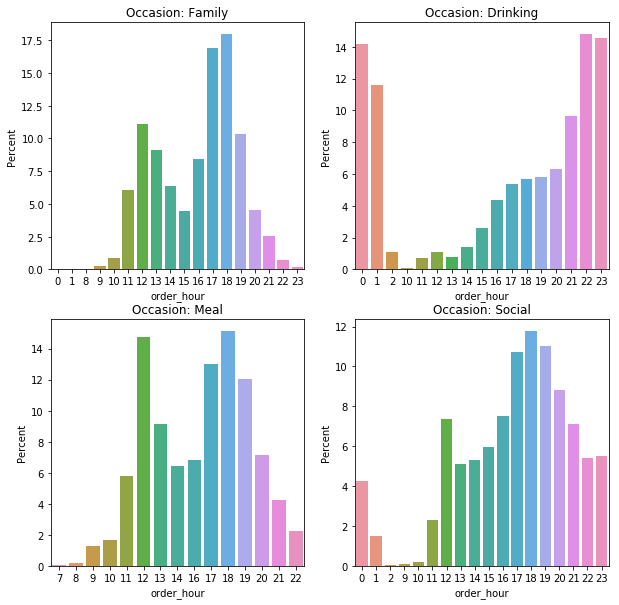

In [34]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.barplot(x='order_hour', y='order_hour', data=dfs[occasion_type], estimator=lambda x: len(x) / len(dfs[occasion_type]) * 100, ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set(ylabel="Percent")

Insights:
- it is evident that **drinking** occasions happen mostly during night times (20-1)
- **meals** have peaks during noon (12, lunch) and evening (18, dinner), also there are more orders on mornings (9-10, breakfast)
- **social** events somehow split evenly from 12pm to 12am
- **family** events are rare late at night

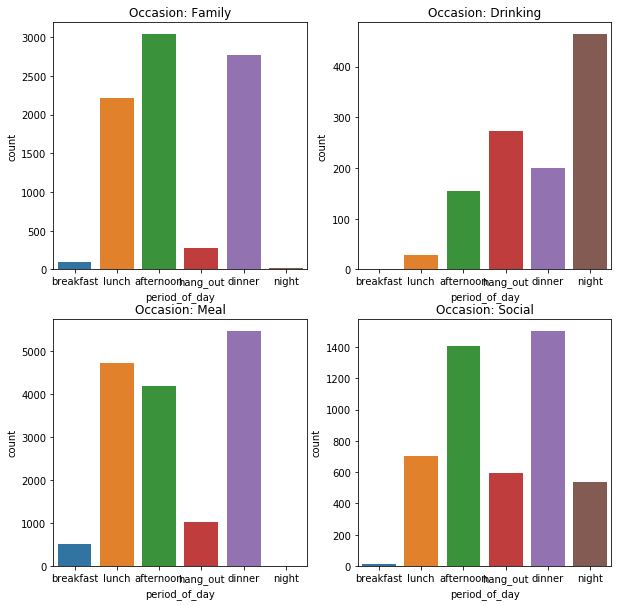

In [35]:
order = ['breakfast', 'lunch', 'afternoon', 'hang_out', 'dinner', 'night']

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='period_of_day', data=dfs[occasion_type], order=order, ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)

Insights (basically the same as above):
- definitely more breakfast tables in the **meals** bin
- ...

1 guest tables are more likely at *hang_out* / *night* times rather than at *lunch* compared to the other bins.

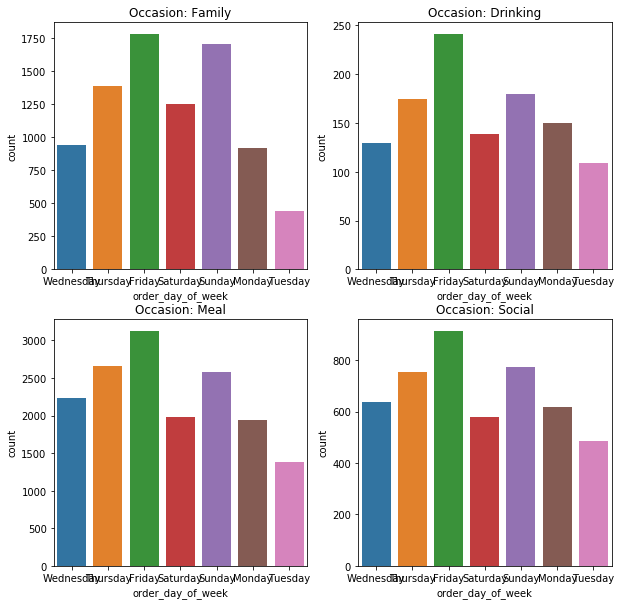

In [36]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='order_day_of_week', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)

Tables of many guests (3+) are more likely on Sundays than during the weekdays.

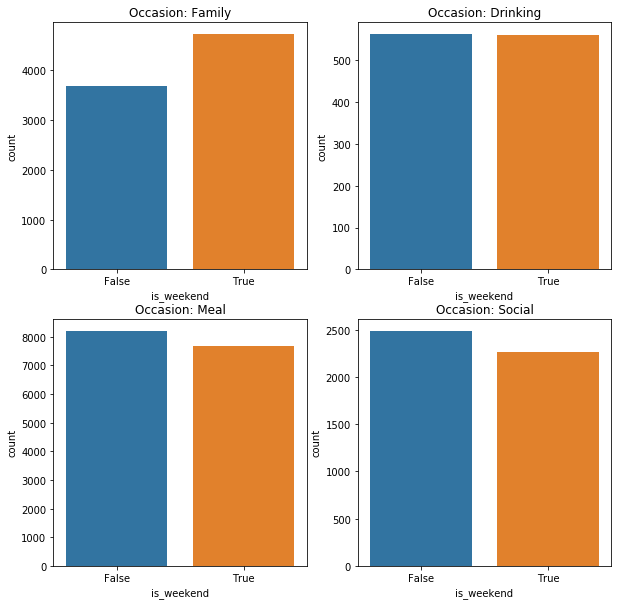

In [37]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='is_weekend', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)

Insights:
- **family** occasions are more common on weekends than weekdays compared to other occasions

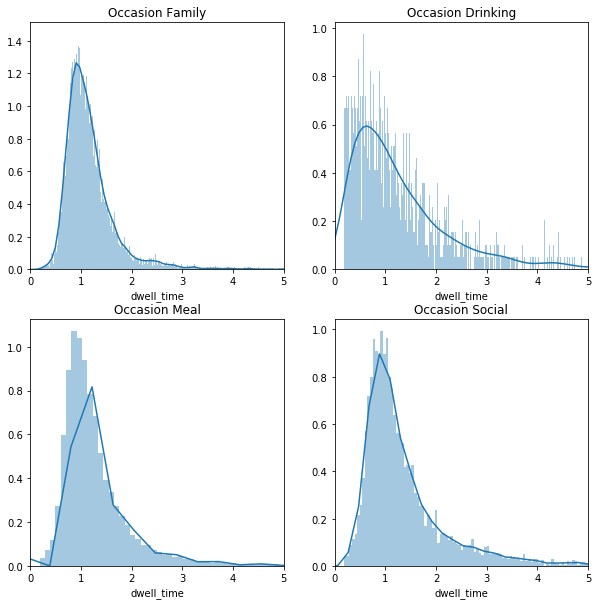

In [38]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.distplot(dfs[occasion_type]['dwell_time'], bins=500, ax=axes[i])
    axes[i].title.set_text('Occasion ' + occasion_type)
    axes[i].set_xlim(0, 5)

Insights:
- **family** occasions are shorter
- all occasions are with a peak at 1 hour
- **drinking** & **social** occasions have a longer tail towards the right (higher dwell_time)

#### 2. Counts (3 + 11 + 2 = 16)

- `item_qty`
- `beer_volume`
- `guest_count`


- `total_orders_category_id_1.0`
- `total_orders_category_id_2.0`
- `total_orders_category_id_3.0`
- `total_orders_category_id_4.0`
- `total_orders_category_id_5.0`
- `total_orders_category_id_6.0`
- `total_orders`
- `total_large_meals`
- `total_small_meals`
- `total_large_sharable_meals`
- `total_small_sharable_meals`


- `total_sales_before_tax`
- `total_sales_inc_tax`

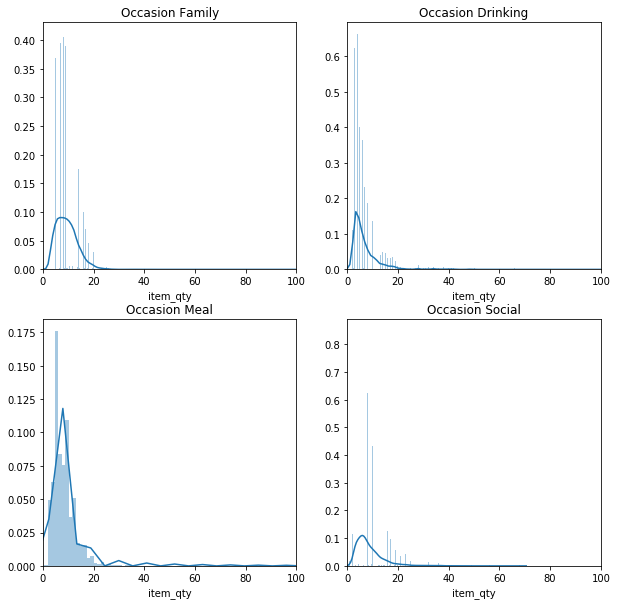

In [39]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.distplot(dfs[occasion_type]['item_qty'], bins=500, ax=axes[i])
    axes[i].title.set_text('Occasion ' + occasion_type)
    axes[i].set_xlim(0, 100)

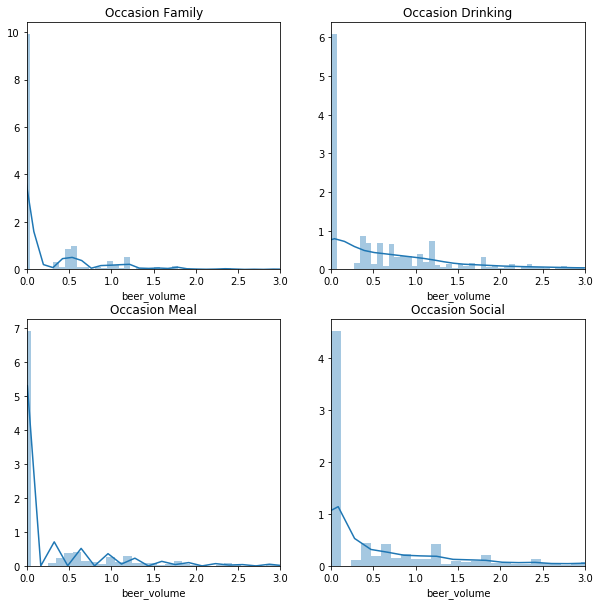

In [40]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.distplot(dfs[occasion_type]['beer_volume'], bins=200, ax=axes[i])
    axes[i].title.set_text('Occasion ' + occasion_type)
    axes[i].set_xlim(0, 3)

Insights:
- **family** occasions order the least amount of beer
- then come the **drinking** and **social** occasions

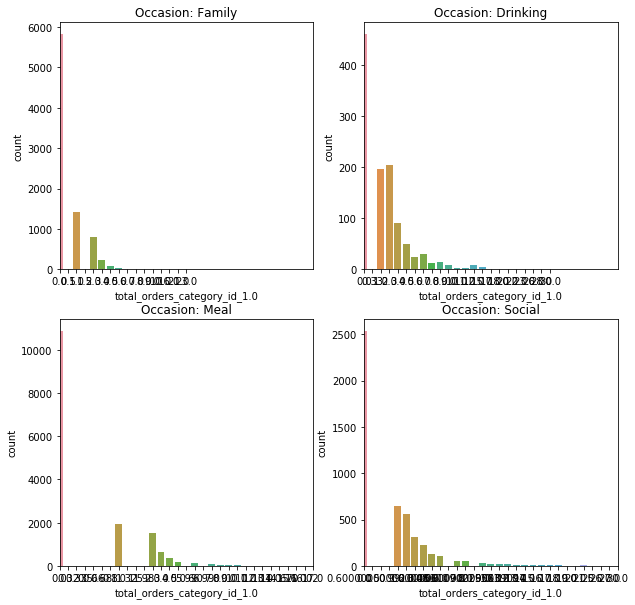

In [41]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders_category_id_1.0', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **drinking** and **social** tables order more beers

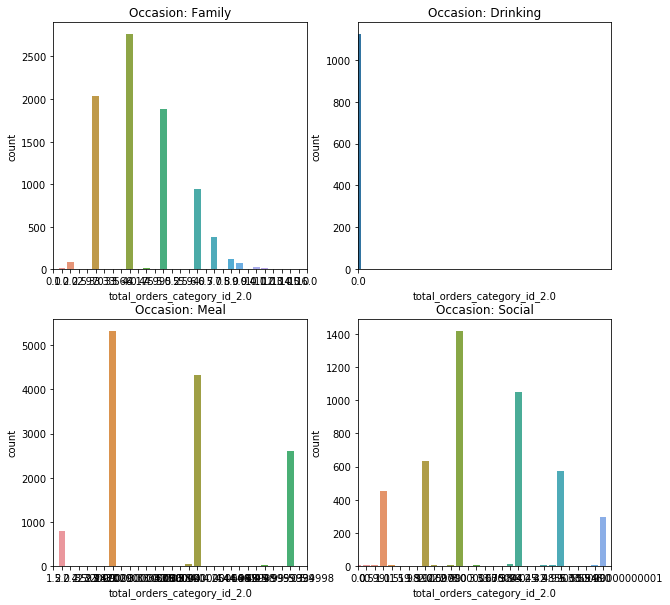

In [42]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders_category_id_2.0', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **drinking** order no category 2 items at all! (that stems from our heuristics)
- **meals** occasions have higher counts of lower number of orders, maybe because their dishes are larger

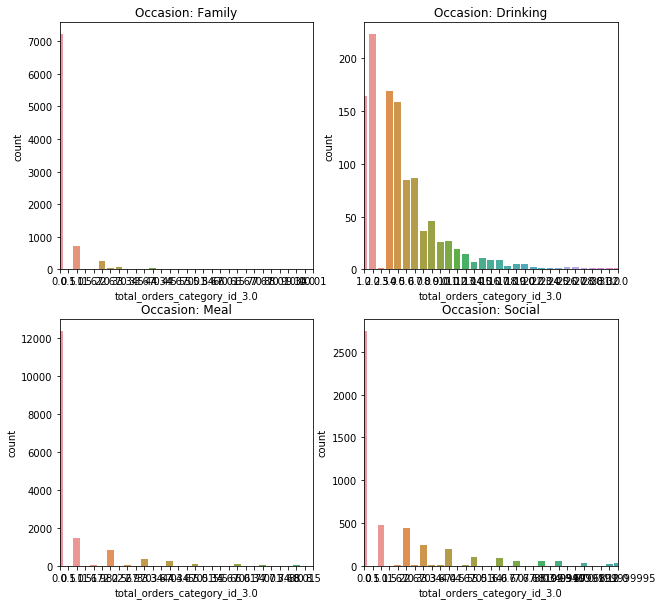

In [43]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders_category_id_3.0', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **drinking** have more orders of alcoholic drinks (by definition)

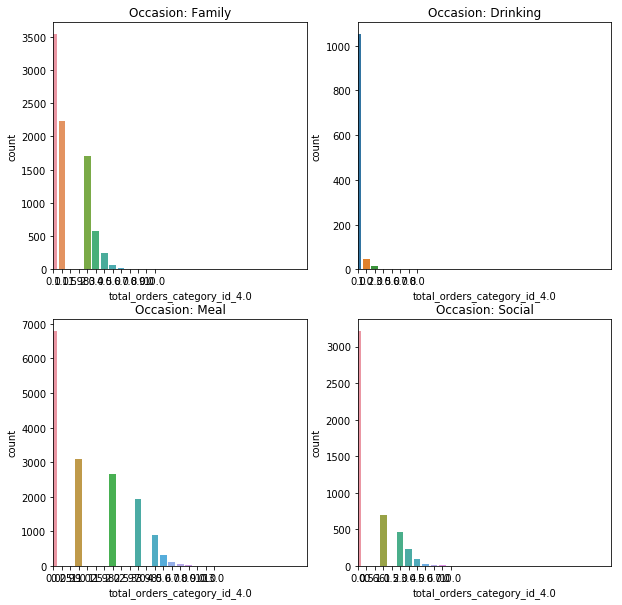

In [44]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders_category_id_4.0', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **drinking** usaully drink alcohol, no light drinks

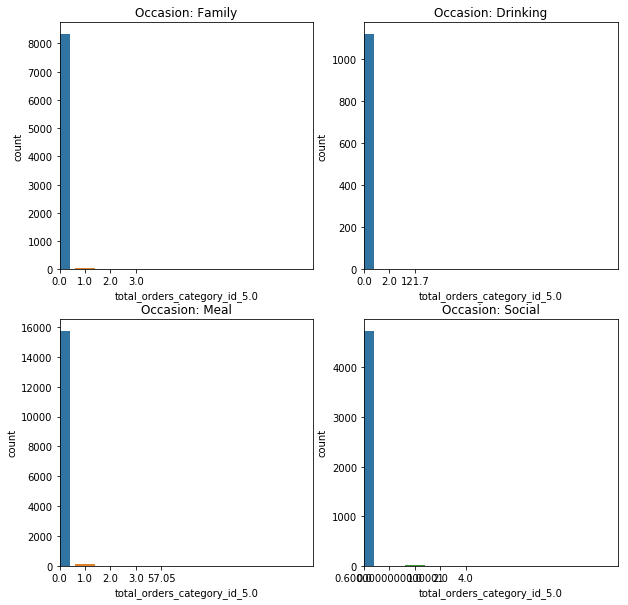

In [45]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders_category_id_5.0', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 10)

The explanation for the zeros is probably because most of this dishes are side-outs which cost 0 (filtered in the pre-processing phase).

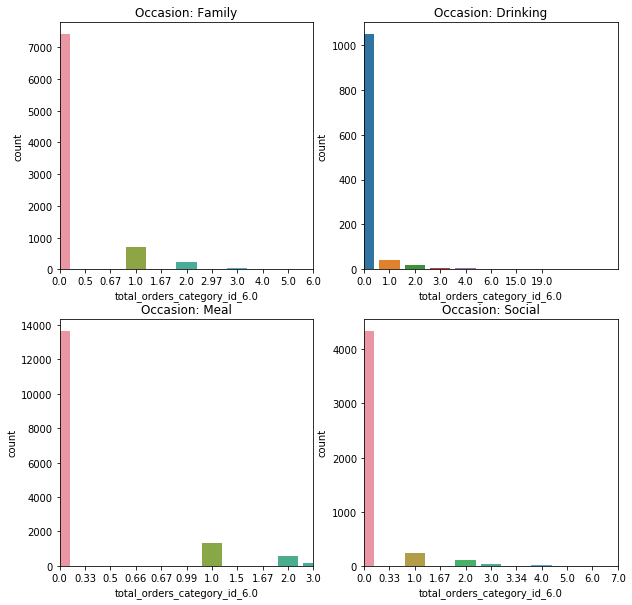

In [46]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders_category_id_6.0', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 10)

Insights:
- **drinking** tables usally drink alcohol, no wines

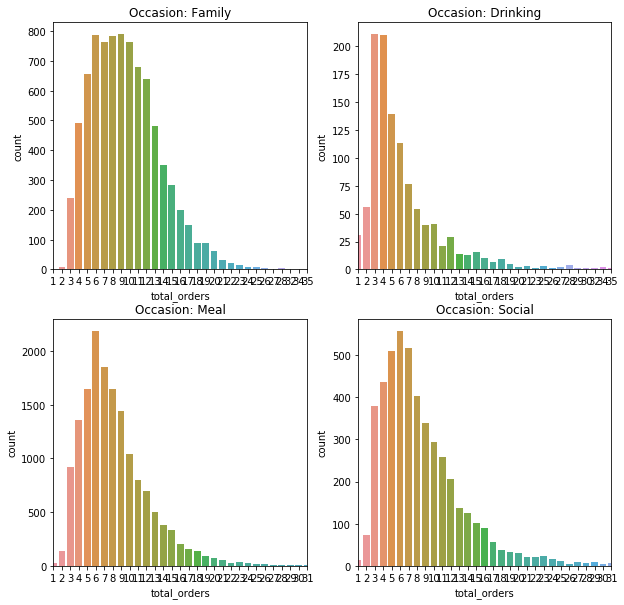

In [47]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_orders', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **family** occasions distribution for `total_orders` is less varied

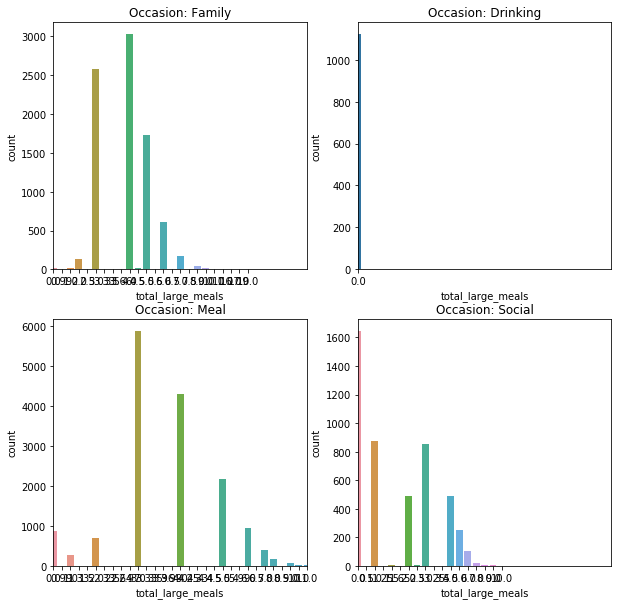

In [48]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_large_meals', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **meals** have more large meals (again, by definition)

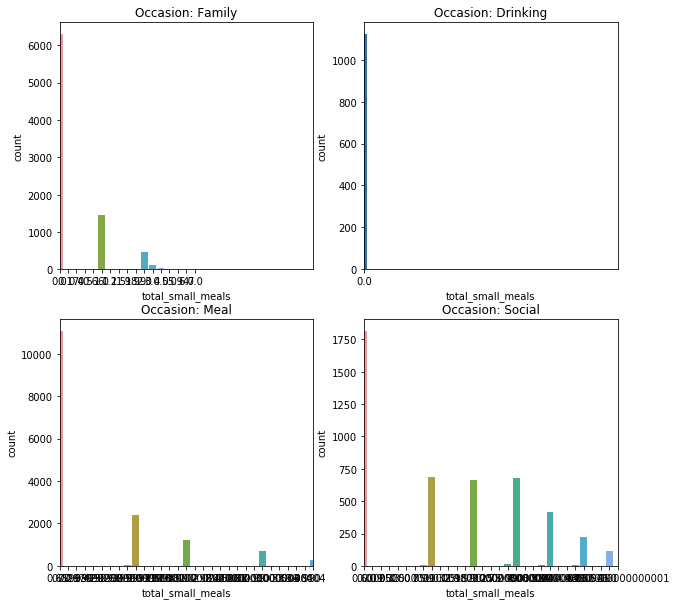

In [49]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_small_meals', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

Insights:
- **social** have more small / sharable meals (again, by definition)

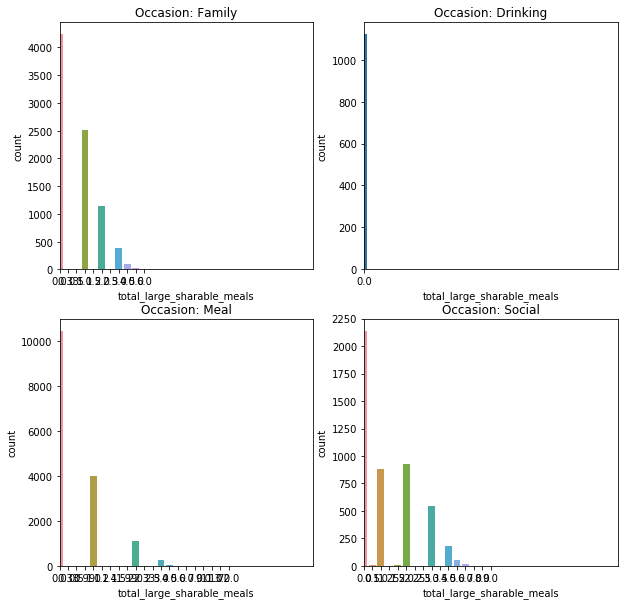

In [50]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_large_sharable_meals', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

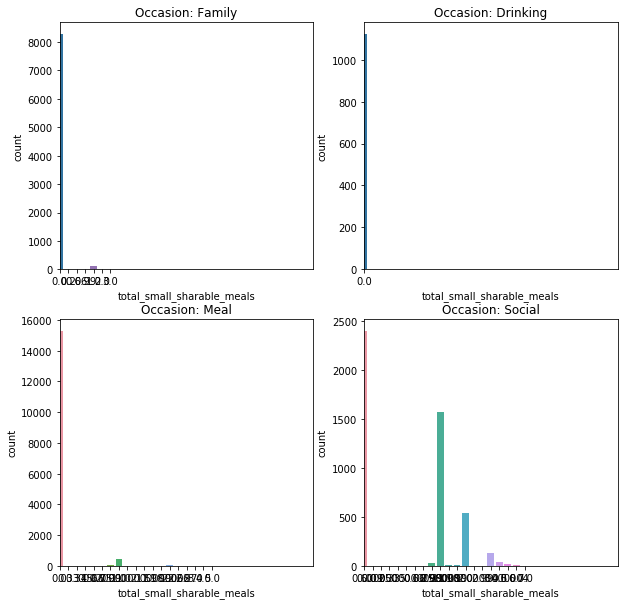

In [51]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='total_small_sharable_meals', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 30)

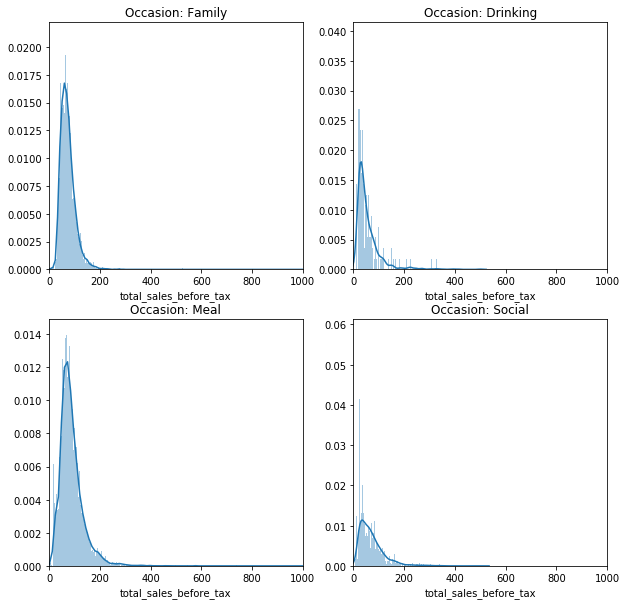

In [52]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.distplot(dfs[occasion_type]['total_sales_before_tax'], bins=1000, ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)
    axes[i].set_xlim(0, 1000)

Insights:
- is it possible that **family** / **meals** pay less?

#### 3. General (3)

- `sharable`
- `kids_meal`
- `birthday`

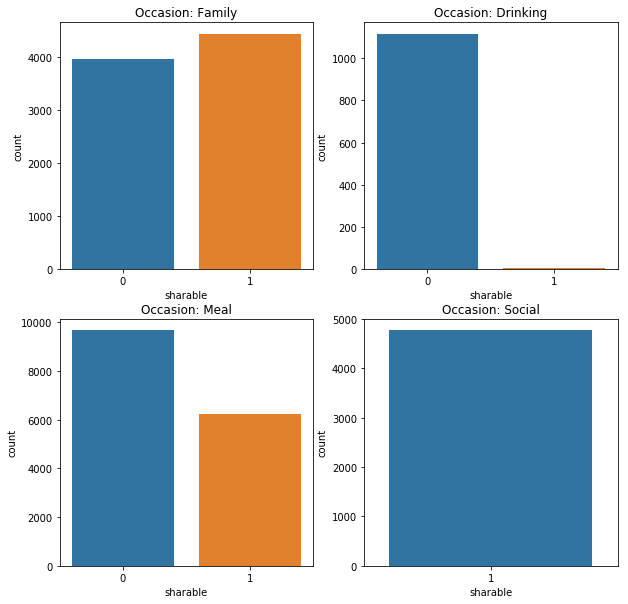

In [53]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='sharable', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)

Insights:
- **drinking** drink
- **social** eat sharable dishes
- **meals** have the least amount of sharable dishes (among those who do - everyone except **drinking**)

Tables of more guests tend to order more sharable dishes.

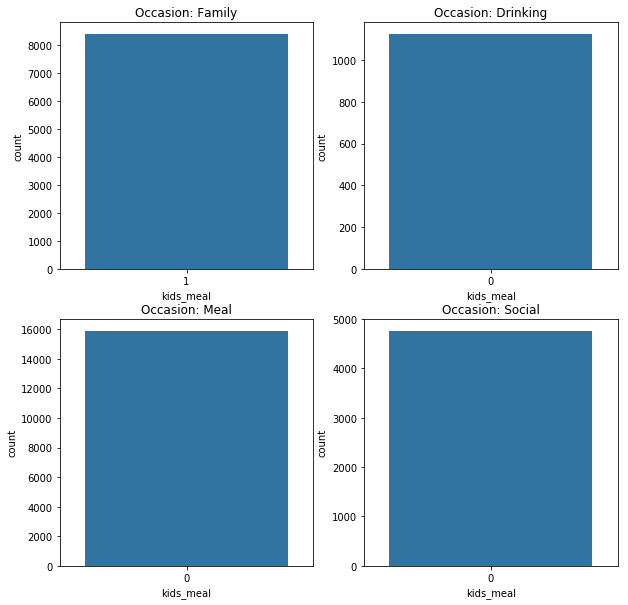

In [54]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='kids_meal', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)

By definition.

Kids usually arrive accompanied by big families (3+).

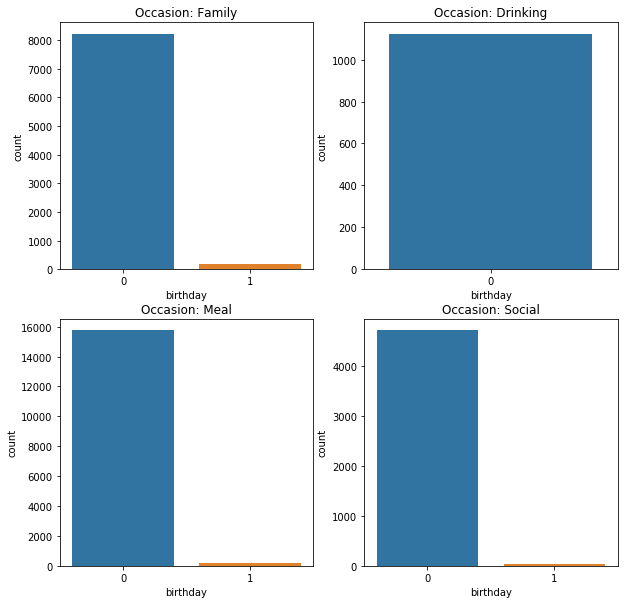

In [55]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(len(occasions_types)):
    occasion_type = occasions_types[i]
    sns.countplot(x='birthday', data=dfs[occasion_type], ax=axes[i])
    axes[i].title.set_text('Occasion: ' + occasion_type)

Insights:
- No drinking birthdays?
- Birthdays occur more often with family

Same for birthdays, more guests involved.

#### 4. Not Relevant (6)

- `meal_flow_last_to_close`
- `total_flow_steps`
- `total_meal_steps`
- `avg_time_between_steps`
- `sit_to_order`
- `max_items_per_step`

## 5. Unknown

In [56]:
UNKNOWN = "UNKNOWN"

In [57]:
unknown = df[df.occasion == UNKNOWN]
print("There are {} unknown occasions ({}%)".format(len(unknown), round(100 * len(unknown) / len(df), 2)))

There are 2541 unknown occasions (7.76%)


In [58]:
unknown.head()

,order_id,order_time,order_time_closed,order_hour,period_of_day,order_day_of_week,is_weekend,item_qty,beer_volume,guest_count,total_orders_category_id_1.0,total_orders_category_id_2.0,total_orders_category_id_3.0,total_orders_category_id_4.0,total_orders_category_id_5.0,total_orders_category_id_6.0,total_orders,total_large_meals,total_small_meals,total_large_sharable_meals,total_small_sharable_meals,sharable,kids_meal,birthday,dwell_time,meal_flow_last_to_close,total_flow_steps,total_meal_steps,avg_time_between_steps,sit_to_order,max_items_per_step,total_sales_before_tax,occasion
0,510839700,2019-04-10 00:55:00,2019-04-10 01:21:22,0,night,Wednesday,False,6.0,0.000,3,0.0,0.0,0.0,0.0,0.0,6.0,6,0.0,0.0,0.0,0.0,0,0,0,0.439444,0,4,3,5.666667,1,3,91.75,UNKNOWN
2,510841710,2019-04-10 00:44:00,2019-04-10 01:49:33,0,night,Wednesday,False,9.0,4.728,4,8.0,1.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0,0,0,0,1.092500,3,14,5,9.000000,1,4,71.00,UNKNOWN
6,510846577,2019-04-10 00:25:00,2019-04-10 01:49:44,0,night,Wednesday,False,6.0,2.364,3,6.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0,0,0,1.412222,15,20,3,7.000000,1,3,40.75,UNKNOWN
8,510846579,2019-04-10 00:30:00,2019-04-10 01:00:41,0,night,Wednesday,False,5.0,1.705,3,5.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0,0,0,0.511389,2,7,2,10.500000,1,3,29.75,UNKNOWN
11,510852761,2019-04-10 01:37:00,2019-04-10 02:08:54,1,night,Wednesday,False,5.0,1.182,5,2.0,1.0,2.0,0.0,0.0,0.0,5,1.0,0.0,0.0,0.0,0,0,0,0.531667,3,7,3,5.666667,1,3,40.22,UNKNOWN
